
---

## 🧑🏻‍💻 About the Author  
**Name:** Arif Miah  

🎓 **Profession:** Machine Learning Engineer & Data Scientist  

---

### 🔭 **Career Objective**  
🚀 My goal is to contribute to groundbreaking advancements in artificial intelligence and data science, empowering companies and individuals with data-driven solutions. I strive to simplify complex challenges, craft innovative projects, and pave the way for a smarter and more connected future.  

🔍 As a **Machine Learning Engineer** and **Data Scientist**, I am passionate about using machine learning, deep learning, computer vision, and advanced analytics to solve real-world problems. My expertise lies in delivering impactful solutions by leveraging cutting-edge technologies.  

---

### 💻 **Skills**  
- 🤖 **Artificial Intelligence & Machine Learning**  
- 👁️‍🗨️ **Computer Vision & Predictive Analytics**  
- 🧠 **Deep Learning & Natural Language Processing (NLP)**  
- 🐍 **Python Programming & Automation**  
- 📊 **Data Visualization & Analysis**  
- 🚀 **End-to-End Model Development & Deployment**  

---

### 🚧 **Featured Projects**  

📊 **Lung Cancer Prediction with Deep Learning**  
Achieved 99% accuracy in a computer vision project using 12,000 medical images across three classes. This project involved data preprocessing, visualization, and model training to detect cancer effectively.  

🌾 **Ghana Crop Disease Detection Challenge**  
Developed a model using annotated images to identify crop diseases with bounding boxes, addressing real-world agricultural challenges and disease mitigation.  

🛡️ **Global Plastic Waste Analysis**  
Utilized GeoPandas, Matplotlib, and machine learning models like RandomForestClassifier and CatBoostClassifier to analyze trends in plastic waste management.  

🎵 **Twitter Emotion Classification**  
Performed exploratory data analysis and built a hybrid machine learning model to classify Twitter sentiments, leveraging text data preprocessing and visualization techniques.  

---

### ⚙️ **Technical Skills**  

- 💻 **Programming Languages:** Python 🐍, SQL 🗃️, R 📈  
- 📊 **Data Visualization Tools:** Matplotlib 📉, Seaborn 🌊, Tableau 📊, Power BI 📊  
- 🧠 **Machine Learning & Deep Learning:** Scikit-learn 🤖, TensorFlow 🔥, PyTorch 🧩  
- 🗂️ **Big Data Technologies:** Hadoop 🏗️, Spark ⚡  
- 🚀 **Model Deployment:** Flask 🌐, FastAPI ⚡, Docker 🐳  

---

### 🌐 **Connect with Me**  

📧 **Email:** arifmiahcse@gmail.com 

🔗 **LinkedIn:** [www.linkedin.com/in/arif-miah-8751bb217](#)  

🐱 **GitHub:** [https://github.com/Arif-miad](#)  

📝 **Kaggle:** [https://www.kaggle.com/miadul](#)  



In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

In [2]:
df = pd.read_csv("/kaggle/input/crop-and-soil-dataset/data_core.csv")

In [3]:
df.head()

Temparature  Humidity  Moisture Soil Type  Crop Type  Nitrogen  Potassium  \
0         26.0      52.0      38.0     Sandy      Maize        37          0   
1         29.0      52.0      45.0     Loamy  Sugarcane        12          0   
2         34.0      65.0      62.0     Black     Cotton         7          9   
3         32.0      62.0      34.0       Red    Tobacco        22          0   
4         28.0      54.0      46.0    Clayey      Paddy        35          0   

   Phosphorous Fertilizer Name  
0            0            Urea  
1           36             DAP  
2           30        14-35-14  
3           20           28-28  
4            0            Urea

In [4]:
df.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.shape

(8000, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temparature      8000 non-null   float64
 1   Humidity         8000 non-null   float64
 2   Moisture         8000 non-null   float64
 3   Soil Type        8000 non-null   object 
 4   Crop Type        8000 non-null   object 
 5   Nitrogen         8000 non-null   int64  
 6   Potassium        8000 non-null   int64  
 7   Phosphorous      8000 non-null   int64  
 8   Fertilizer Name  8000 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 562.6+ KB


In [8]:
df.describe()

Temparature     Humidity     Moisture     Nitrogen    Potassium  \
count  8000.000000  8000.000000  8000.000000  8000.000000  8000.000000   
mean     30.338895    59.210731    43.580863    18.429125     3.916375   
std       4.478262     8.177366    12.596156    11.852406     5.494807   
min      20.000000    40.020000    20.000000     0.000000     0.000000   
25%      27.050000    53.277500    33.967500     9.000000     0.000000   
50%      30.240000    59.110000    42.250000    14.000000     1.000000   
75%      33.460000    65.082500    52.950000    26.000000     5.000000   
max      40.000000    80.000000    70.000000    46.000000    23.000000   

       Phosphorous  
count  8000.000000  
mean     18.512500  
std      13.244113  
min       0.000000  
25%       8.000000  
50%      18.000000  
75%      30.000000  
max      46.000000

In [9]:
# Convert categorical columns to categorical type
categorical_columns = ["Soil Type", "Crop Type", "Fertilizer Name"]
for col in categorical_columns:
    df[col] = df[col].astype("category")

Text(0.5, 1.0, 'Count Plot - Soil Type')

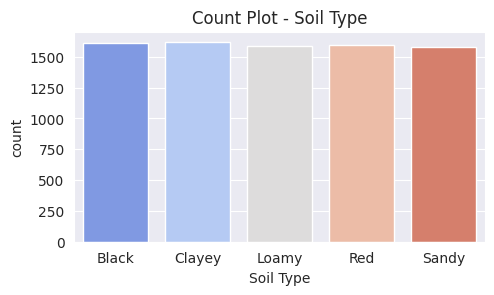

In [10]:
# Set plot style
sns.set_style("darkgrid")

# Initialize figure size
plt.figure(figsize=(18, 6))

# --- 🔹 1. Count Plot ---
plt.subplot(2, 3, 1)
sns.countplot(x="Soil Type", data=df, palette="coolwarm")
plt.title("Count Plot - Soil Type")

Text(0.5, 1.0, 'Histogram - Temperature')

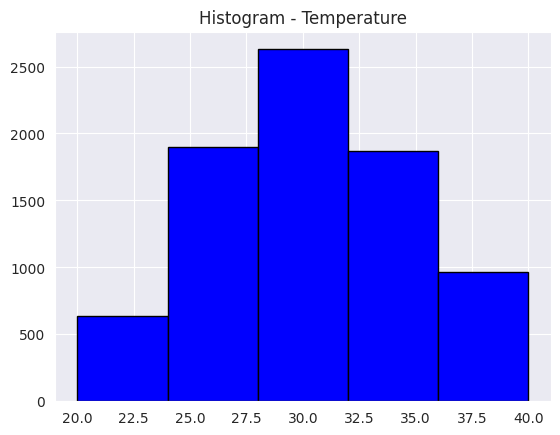

In [11]:
# --- 🔹 2. Histogram ---
plt.subplot(1, 1, 1)
plt.hist(df["Temparature"], bins=5, color="blue", edgecolor="black")
plt.title("Histogram - Temperature")


Text(0.5, 1.0, 'Bar Plot - Moisture by Crop Type')

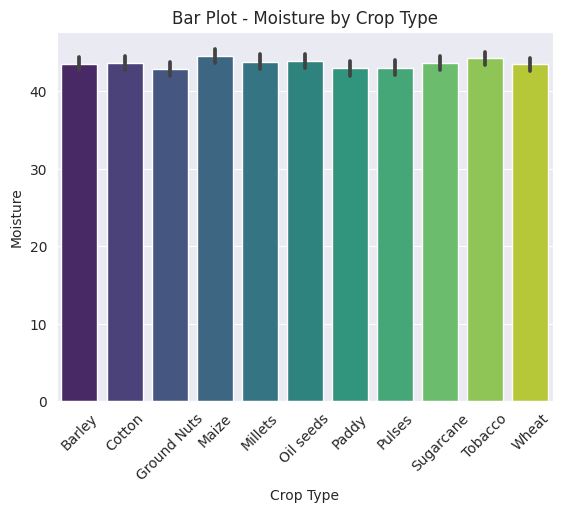

In [12]:

plt.subplot(1, 1, 1)
sns.barplot(x="Crop Type", y="Moisture", data=df, palette="viridis")
plt.xticks(rotation=45)
plt.title("Bar Plot - Moisture by Crop Type")

Text(0.5, 1.0, 'Box Plot - Nitrogen by Soil Type')

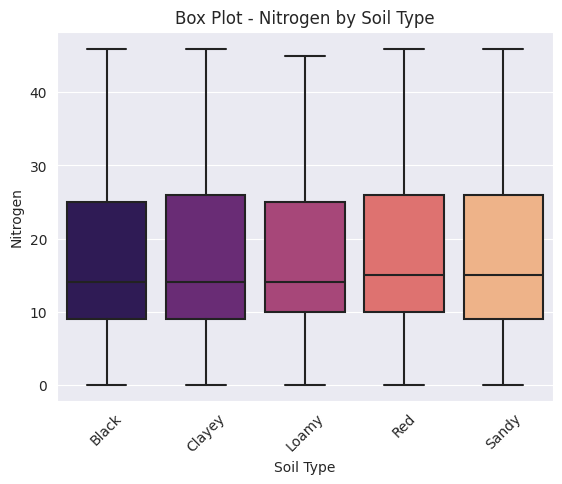

In [13]:
plt.subplot(1, 1, 1)
sns.boxplot(x="Soil Type", y="Nitrogen", data=df, palette="magma")
plt.xticks(rotation=45)
plt.title("Box Plot - Nitrogen by Soil Type")

<Axes: >

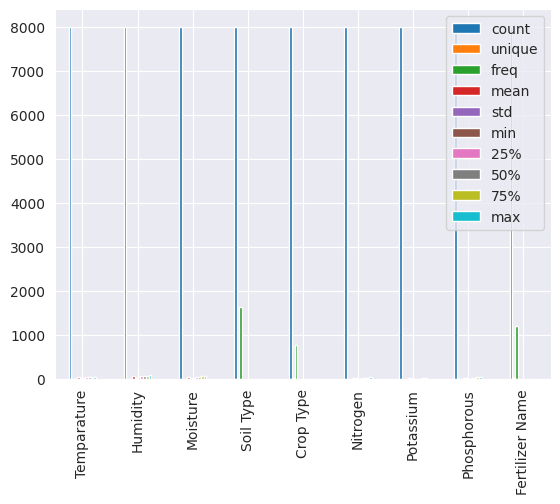

In [14]:
df.describe(include='all').T.plot(kind='bar')

In [15]:
numerical_col = df.select_dtypes(include=['number']).columns
print(numerical_col)  

Index(['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium',
       'Phosphorous'],
      dtype='object')


<Figure size 1000x600 with 0 Axes>

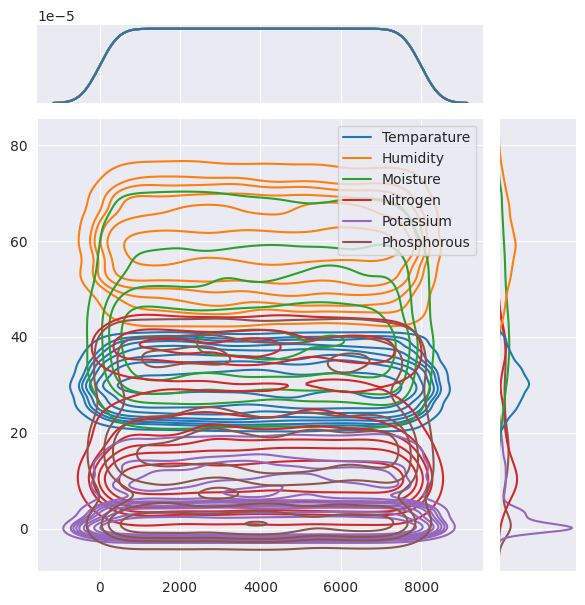

In [16]:
plt.figure(figsize=(10,6))
sns.jointplot(data=df[numerical_col],kind='kde')
plt.show()

Text(0.5, 1.0, 'Scatter Plot - Temperature vs Humidity')

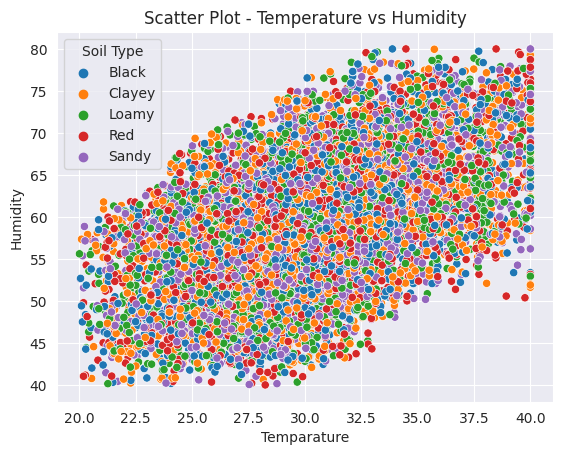

In [17]:
plt.subplot(1, 1, 1)
sns.scatterplot(x="Temparature", y="Humidity", hue="Soil Type", data=df)
plt.title("Scatter Plot - Temperature vs Humidity")


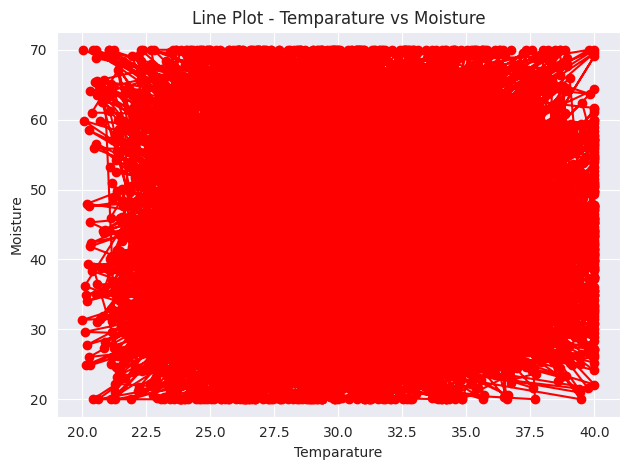

In [18]:
plt.subplot(1, 1, 1)
plt.plot(df["Temparature"], df["Moisture"], marker="o", linestyle="-", color="red")
plt.xlabel("Temparature")
plt.ylabel("Moisture")
plt.title("Line Plot - Temparature vs Moisture")

plt.tight_layout()
plt.show()

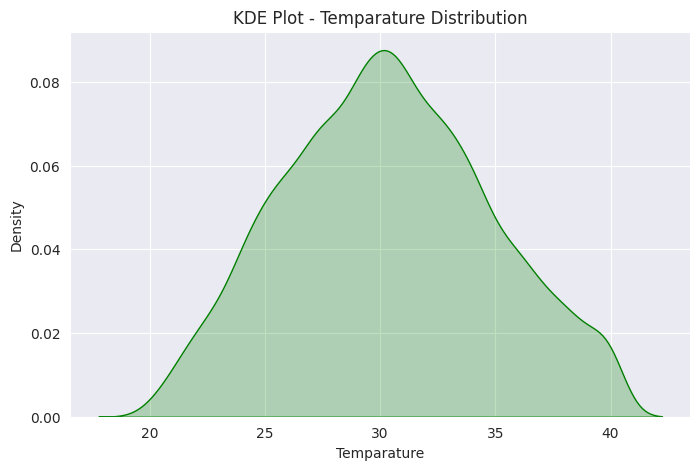

In [19]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df["Temparature"], fill=True, color="green")
plt.title("KDE Plot - Temparature Distribution")
plt.show()

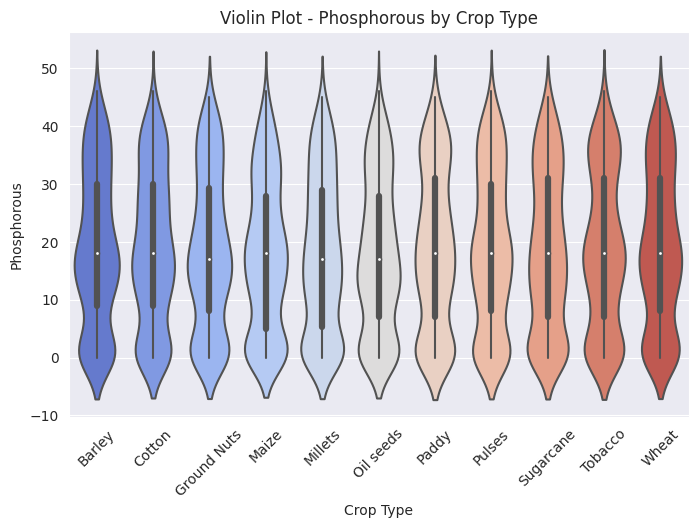

In [20]:
plt.figure(figsize=(8, 5))
sns.violinplot(x="Crop Type", y="Phosphorous", data=df, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Violin Plot - Phosphorous by Crop Type")
plt.show()

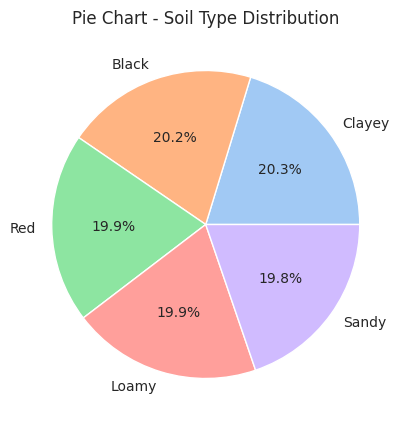

In [21]:
plt.figure(figsize=(8, 5))
df["Soil Type"].value_counts().plot.pie(autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title("Pie Chart - Soil Type Distribution")
plt.ylabel("")
plt.show()

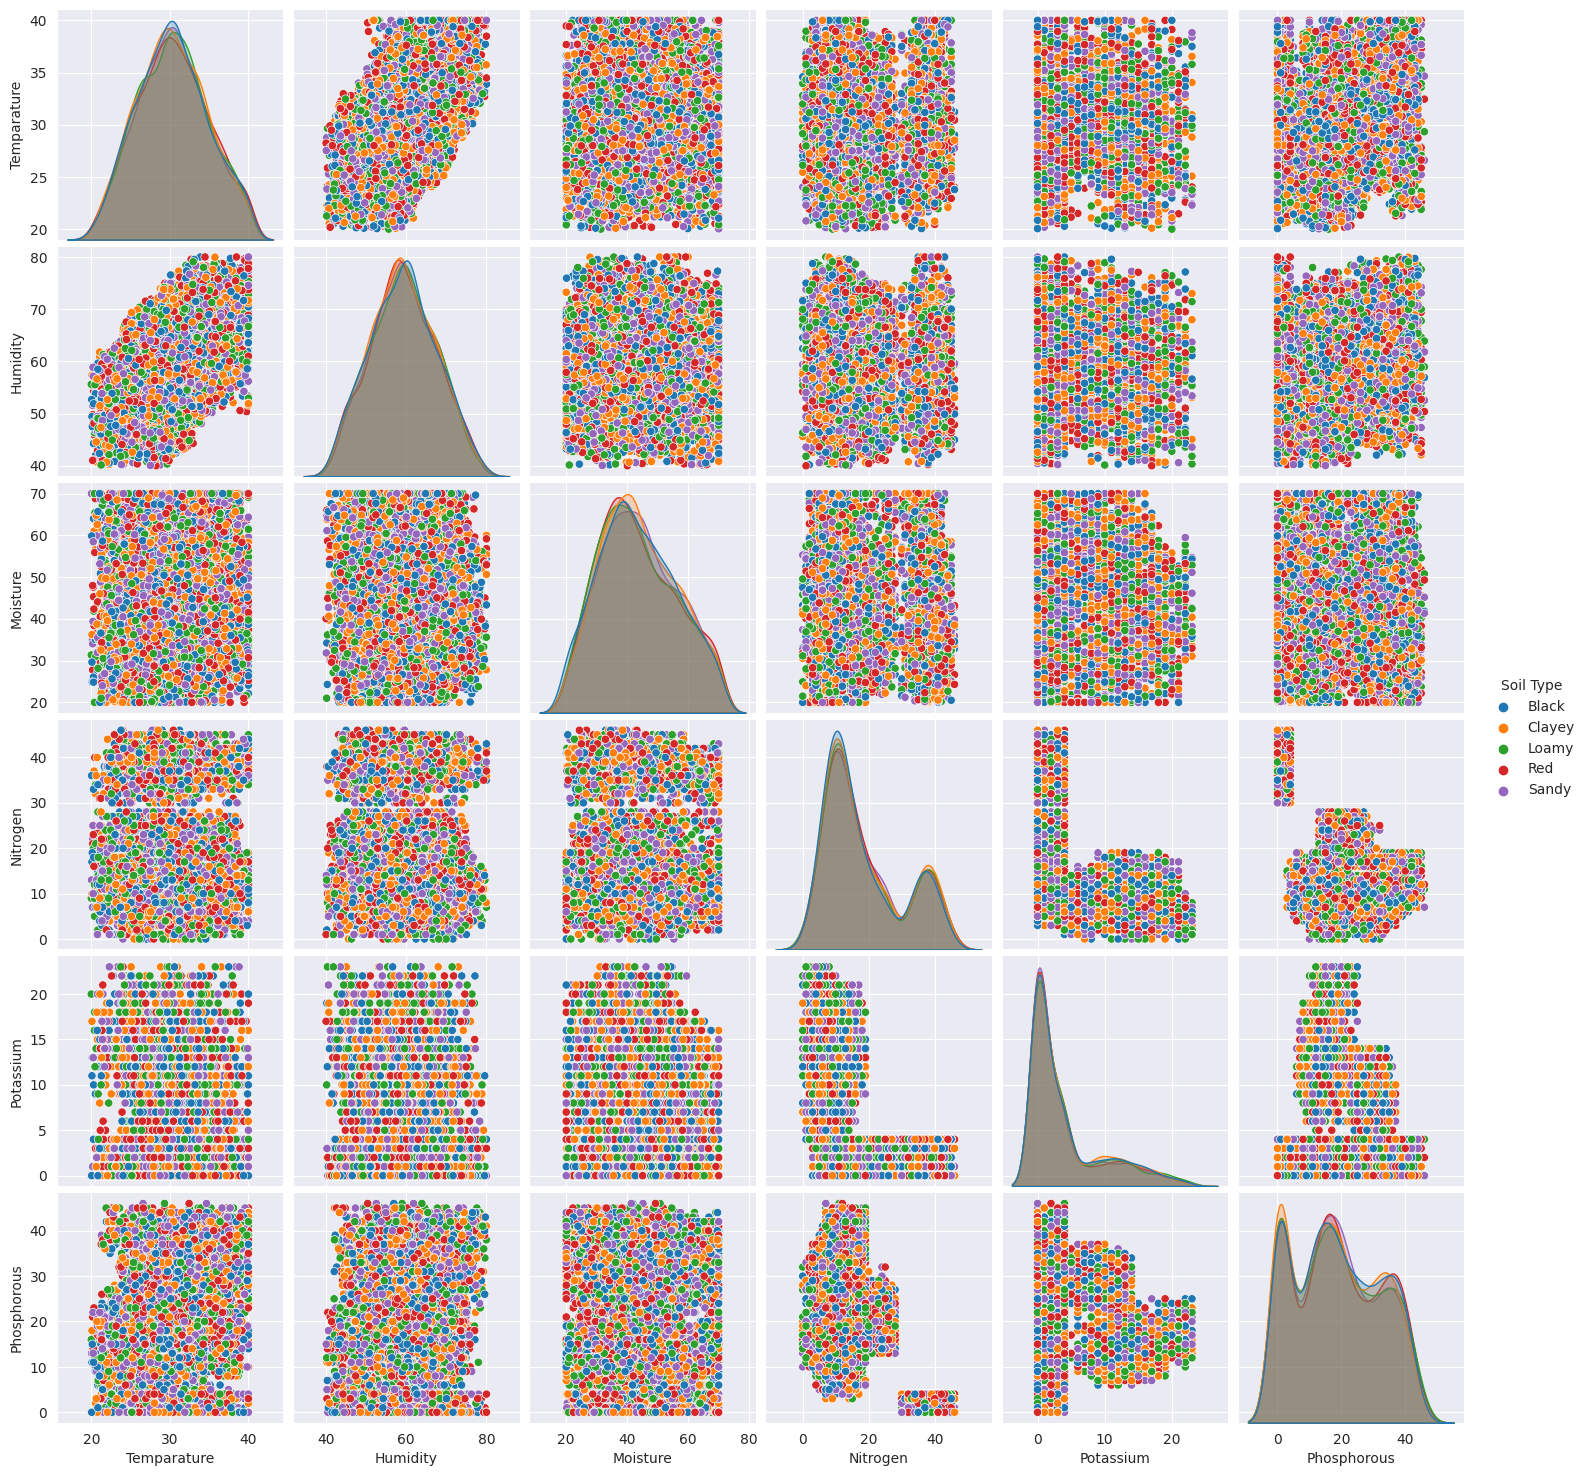

In [22]:
sns.pairplot(df, hue="Soil Type", diag_kind="kde")
plt.show()

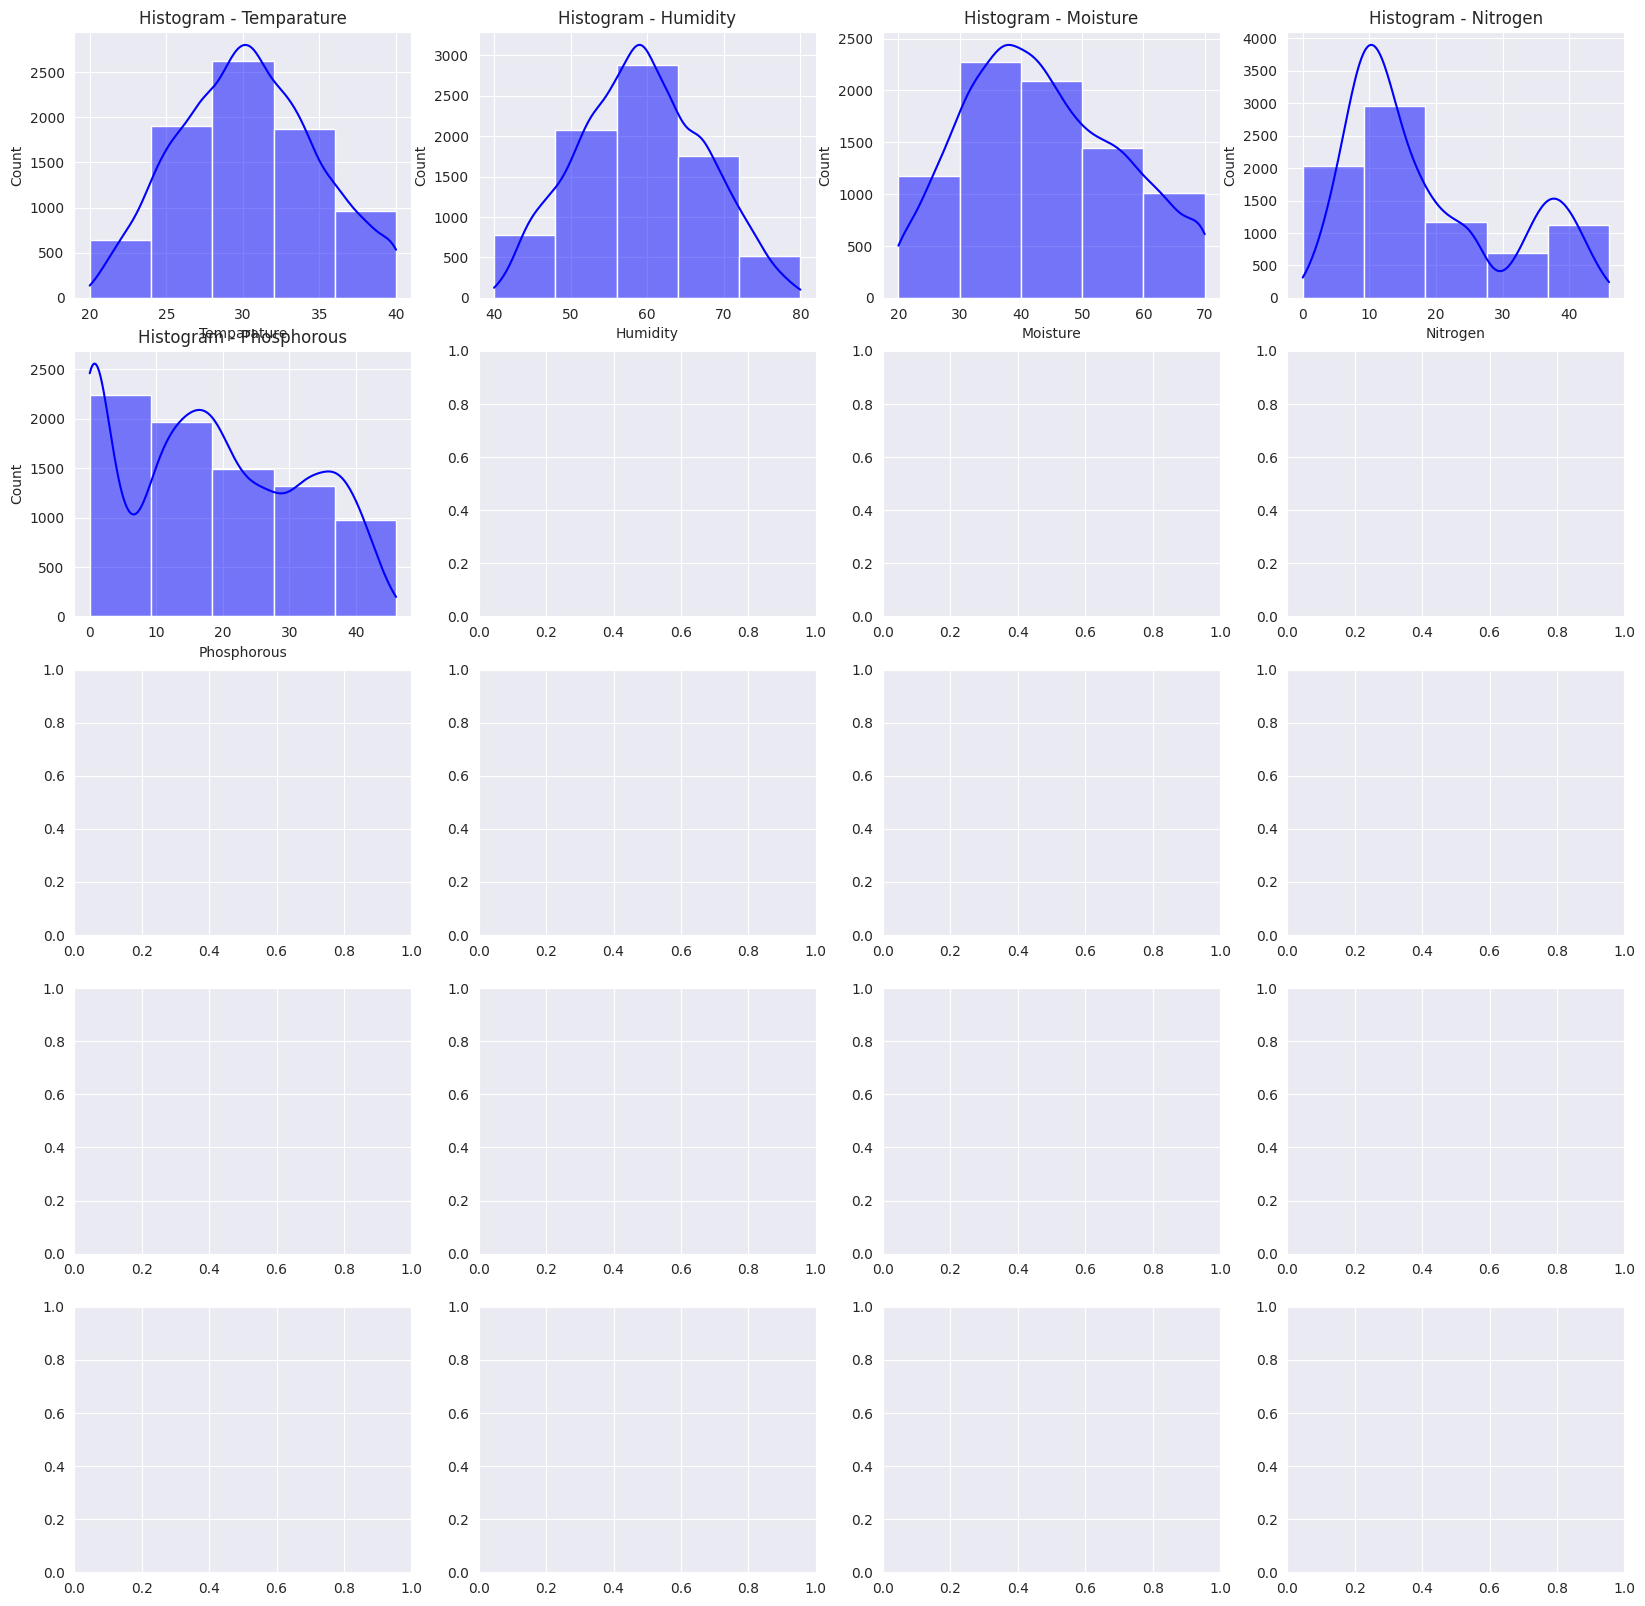

In [23]:
# --- Additional Plots ---
fig, axes = plt.subplots(5, 4, figsize=(20, 20))

# --- 🔹 12-16. Histograms ---
columns_to_plot = ["Temparature", "Humidity", "Moisture", "Nitrogen", "Phosphorous"]
for i, col in enumerate(columns_to_plot):
    sns.histplot(df[col], bins=5, kde=True, color="blue", ax=axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(f"Histogram - {col}")


In [24]:
for i, col in enumerate(columns_to_plot):
    sns.boxplot(y=df[col], color="orange", ax=axes[(i + 5) // 4, (i + 5) % 4])
    axes[(i + 5) // 4, (i + 5) % 4].set_title(f"Box Plot - {col}")

sns.scatterplot(x="Temparature", y="Nitrogen", data=df, ax=axes[2, 0])
sns.scatterplot(x="Humidity", y="Moisture", data=df, ax=axes[2, 1])
sns.scatterplot(x="Moisture", y="Phosphorous", data=df, ax=axes[2, 2])
sns.scatterplot(x="Temparature", y="Potassium", data=df, ax=axes[2, 3])
sns.scatterplot(x="Humidity", y="Nitrogen", data=df, ax=axes[3, 0])

sns.kdeplot(df["Temparature"], fill=True, ax=axes[3, 1])
sns.kdeplot(df["Moisture"], fill=True, ax=axes[3, 2])
sns.violinplot(y=df["Humidity"], ax=axes[3, 3])
sns.violinplot(y=df["Phosphorous"], ax=axes[4, 0])

plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

In [25]:
sns.kdeplot(df["Temparature"], fill=True, ax=axes[3, 1])
sns.kdeplot(df["Moisture"], fill=True, ax=axes[3, 2])
sns.violinplot(y=df["Humidity"], ax=axes[3, 3])
sns.violinplot(y=df["Phosphorous"], ax=axes[4, 0])

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [26]:
categorical_cols = ["Soil Type", "Crop Type", "Fertilizer Name"]
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

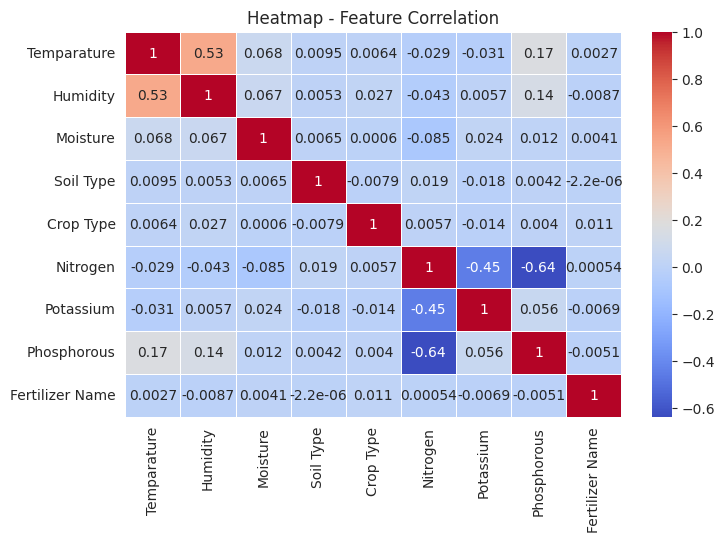

In [27]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap - Feature Correlation")
plt.show()

In [28]:
X = df.drop(columns=["Fertilizer Name","Crop Type"])  # Predicting 'Fertilizer Name'
y = df["Crop Type"]

In [29]:
df.head()

Temparature  Humidity  Moisture  Soil Type  Crop Type  Nitrogen  Potassium  \
0         26.0      52.0      38.0          4          3        37          0   
1         29.0      52.0      45.0          2          8        12          0   
2         34.0      65.0      62.0          0          1         7          9   
3         32.0      62.0      34.0          3          9        22          0   
4         28.0      54.0      46.0          1          6        35          0   

   Phosphorous  Fertilizer Name  
0            0                6  
1           36                5  
2           30                1  
3           20                4  
4            0                6

In [30]:
# 📌 Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 Scale Features (Optional, Good for Logistic Regression & SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
# 📌 Define Top 10 Classification Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0)
}

🔹 Model: Logistic Regression
               precision    recall  f1-score   support

           0       0.09      0.06      0.07       144
           1       0.12      0.06      0.08       141
           2       0.09      0.13      0.11       145
           3       0.10      0.23      0.14       147
           4       0.16      0.03      0.06       149
           5       0.11      0.01      0.02       154
           6       0.00      0.00      0.00       146
           7       0.07      0.26      0.11       125
           8       0.07      0.03      0.04       174
           9       0.07      0.05      0.06       130
          10       0.11      0.17      0.14       145

    accuracy                           0.09      1600
   macro avg       0.09      0.10      0.08      1600
weighted avg       0.09      0.09      0.07      1600

🔹 Model: Random Forest
               precision    recall  f1-score   support

           0       0.06      0.06      0.06       144
           1       0.08 

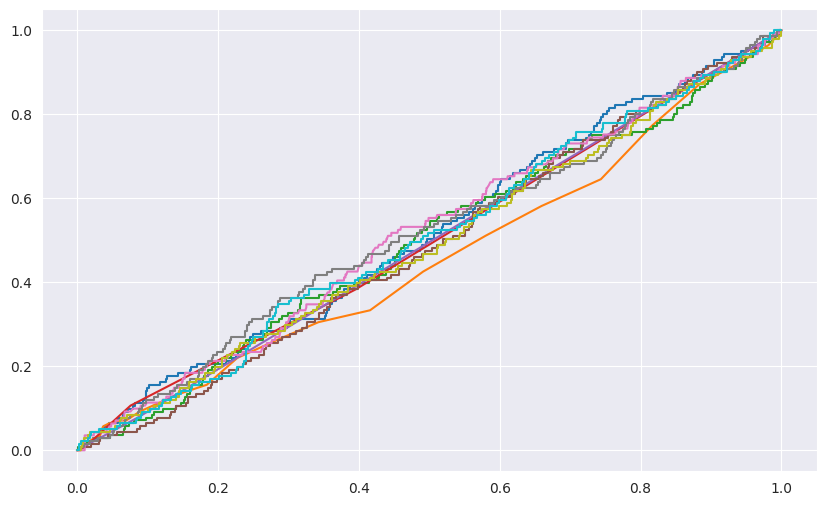

In [32]:
# 📌 Train & Evaluate Models
auc_scores = {}
plt.figure(figsize=(10, 6))

for name, model in models.items():
    # Train Model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    
    # Classification Report
    print(f"🔹 Model: {name}\n", classification_report(y_test, y_pred))
    
    # AUC-ROC Score
    auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
    auc_scores[name] = auc
    
    # AUC-ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1], pos_label=1)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

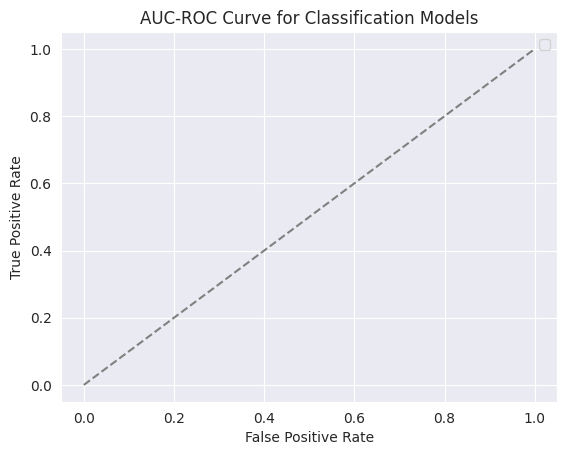

In [33]:
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve for Classification Models")
plt.legend()
plt.show()

In [34]:
auc_scores = dict(sorted(auc_scores.items(), key=lambda x: x[1], reverse=True))
print("\n🔹 Model Performance (Sorted by AUC Score):")
for model, score in auc_scores.items():
    print(f"{model}: AUC = {score:.3f}")


🔹 Model Performance (Sorted by AUC Score):
AdaBoost: AUC = 0.506
Decision Tree: AUC = 0.500
XGBoost: AUC = 0.499
Logistic Regression: AUC = 0.499
LightGBM: AUC = 0.497
Random Forest: AUC = 0.497
CatBoost: AUC = 0.495
K-Nearest Neighbors: AUC = 0.493
Gradient Boosting: AUC = 0.492
Support Vector Machine: AUC = 0.485


In [35]:
# 📌 Feature Importance (Using Random Forest)
feature_importance = RandomForestClassifier().fit(X_train, y_train).feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

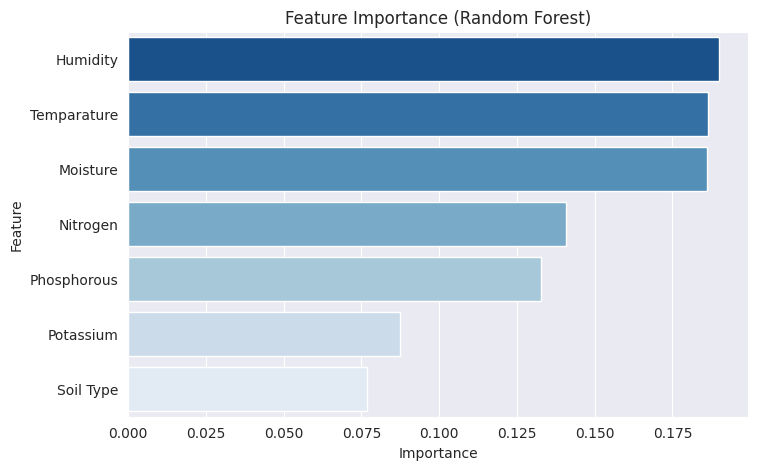

In [36]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='Blues_r')
plt.title("Feature Importance (Random Forest)")
plt.show()

 
# 🚀 **Advanced Machine Learning & Deep Learning Notebooks** | 🔥 **Must-See Insights!**  

Hey Kaggle community! 👋 I'm **Arif Miah**, a **Machine Learning Engineer & Data Scientist**, passionate about building impactful ML/DL models and sharing knowledge with the world. 🌍✨  

## 🏆 **What You’ll Find in My Notebooks?**  
📌 **Deep Learning Projects** – CNN, ANN, RNN, and more!  
📌 **Machine Learning Models** – XGBoost, RandomForest, CatBoost, SVM, and top-class models!  
📌 **Exploratory Data Analysis (EDA)** – Stunning visualizations & feature engineering!  
📌 **Real-World Datasets** – Agriculture, healthcare, finance, and more!  
📌 **End-to-End Solutions** – From preprocessing to deployment-ready models!  

## 🔥 **Some of My Top Notebooks:**  
🔹 **Twitter Emotion Classification** - NLP + Hybrid ML Model 📊  
🔹 **Lung Cancer Detection** - CNN with 99% accuracy 🏥  
🔹 **Ghana Crop Disease Detection** - AI for Smart Agriculture 🌾  
🔹 **Bird Classification using CNN & ANN** - Image classification made easy 🐦  

💡 **I also share practical insights on Kaggle competitions & industry use cases!**  

### 💙 **Support My Work!**  
✅ **Upvote** 👍 if you like my work!  
✅ **Comment & Collaborate** 💬 – Let’s grow together!  
✅ **Follow me on Kaggle** for more awesome notebooks!  

📌 **Let’s push the boundaries of AI & Data Science!** 🚀🔬  

